# Question Answer Evaluation

This notebook is to evaluate the question-answer pairs
generated by the EF model in LCT.

In [1]:
%matplotlib inline
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Get Dataloader

In [2]:
from data_loader import get_loader

# dataloader params
# input_dir = '../../data/vqa/inputs64'
input_dir = '../../data/vqa/inputs224'
max_qst_length = 30
max_num_ans = 10
batch_size = 4
num_workers = 0
train_portion = 0.01

data_loader = get_loader(
    input_dir=input_dir,
    input_vqa_train='train.npy',
    input_vqa_valid='valid.npy',
    max_qst_length=max_qst_length,
    max_num_ans=max_num_ans,
    batch_size=batch_size,
    num_workers=num_workers,
    train_portion=train_portion)

train_loader = data_loader['train']
train_dataset = train_loader.dataset.dataset
print(f'data_loader train len: {len(train_loader)}')
print(f'qst_vocab_size: {train_dataset.qst_vocab.vocab_size}')


data_loader train len: 1110
qst_vocab_size: 17858


### Get Model

In [3]:
from models_lct import VqaModel as LctVqaModel
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# model params
embed_size = 512
qst_vocab_size = train_dataset.qst_vocab.vocab_size
ans_vocab_size = 1000
word_embed_size = 300
num_layers = 1
hidden_size = 512

def get_model(exp_path):
    model = LctVqaModel(
        embed_size=embed_size,
        qst_vocab_size=qst_vocab_size,
        ans_vocab_size=ans_vocab_size,
        word_embed_size=word_embed_size,
        num_layers=num_layers,
        hidden_size=hidden_size
    )
    model_name = 'ef_model.pt'
    model_path = os.path.join(exp_path, model_name)
    state_dict = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict( state_dict['ef_model'] )
    
    # freeze params
    for param in model.parameters():
        param.requires_grad = False
    model.eval()
    return model

exp_dir = './experiment_data'
# exp_name = 'qst_eval'
exp_name = 'qst_eval_224'
exp_path = os.path.join(exp_dir, exp_name)
model = get_model(exp_path)
print('model type:', type(model))

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /tmp/xdg-cache/torch/checkpoints/vgg19-dcbb9e9d.pth



model type: <class 'models_lct.VqaModel'>


### Evaluate Model ( Deterministic Sampling )

qst_encoder deterministic: True temperature: 0.1
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000087513.jpg


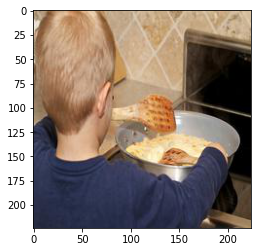

ground truth qst: what food is the boy cooking ? ans: eggs
generated qst: what is the man in the picture doing ? ans: eating


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132303.jpg


ground truth qst: are these zebras free ? ans: yes
generated qst: how many zebras are there ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262463.jpg


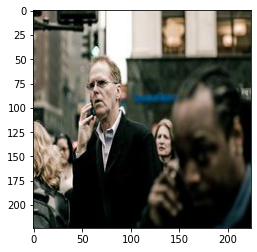

ground truth qst: what is the man holding ? ans: phone
generated qst: what is the man in the picture holding ? ans: tie


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000004376.jpg


ground truth qst: how many men are wearing red tanks ? ans: 1
generated qst: what is the woman holding in her hand ? ans: umbrella


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132299.jpg


ground truth qst: what color shirt is the woman wearing ? ans: yellow
generated qst: what is the dog ' s head ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131190.jpg


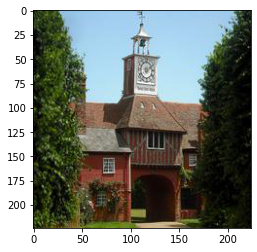

ground truth qst: how many clock faces does this building have ? ans: 1
generated qst: what time is it ? ans: daytime


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262544.jpg


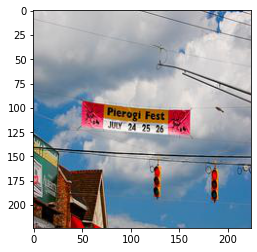

ground truth qst: what is the date of the event ? ans: <unk>
generated qst: what is the name of the street sign ? ans: stop


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132015.jpg


ground truth qst: how many of the giraffes are facing the right side ? ans: 1
generated qst: what is the giraffe ' s face ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525223.jpg


ground truth qst: are the computers in a cubicle ? ans: no
generated qst: what is the color of the mouse ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000510665.jpg


ground truth qst: what color is the trolley ? ans: white
generated qst: what is the name of the street ? ans: 0


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000021991.jpg


ground truth qst: are those ballet shoes ? ans: yes
generated qst: what is the woman holding in her hand ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524651.jpg


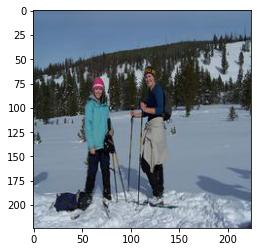

ground truth qst: what color are the ski poles the person on the right is holding ? ans: black and yellow
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524651.jpg


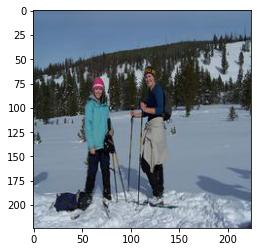

ground truth qst: what color is the girl on the left ' s hat ? ans: pink
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001183.jpg


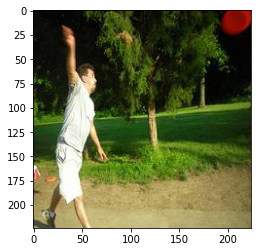

ground truth qst: what surface is the tennis player playing on ? ans: ground
generated qst: what is the man in the background doing ? ans: watching


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263278.jpg


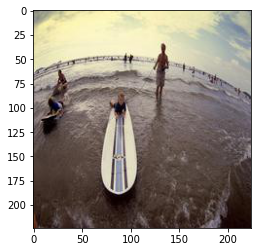

ground truth qst: what is the little boy on ? ans: surfboard
generated qst: what is the man riding on ? ans: surfboard


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263138.jpg


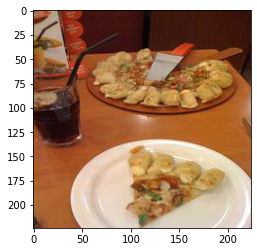

ground truth qst: how many slices of pizza are on the white plate ? ans: 1
generated qst: what is the green vegetable called ? ans: lettuce


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000620.jpg


ground truth qst: how many pizzas are waiting to be baked ? ans: 3
generated qst: what is the name of the restaurant to the left side of the stove ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132262.jpg


ground truth qst: what number is on the parking meter ? ans: <unk>
generated qst: what is the name of the book ? ans: 0


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001059.jpg


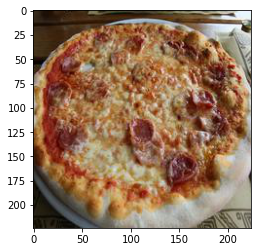

ground truth qst: has this been eaten ? ans: no
generated qst: what is the pizza on top of the plate ? ans: olives


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394234.jpg


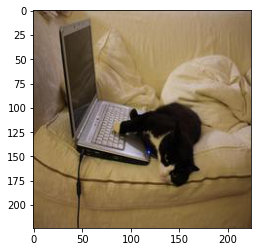

ground truth qst: who is using the computer ? ans: cat
generated qst: what is the cat laying on ? ans: bed


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393900.jpg


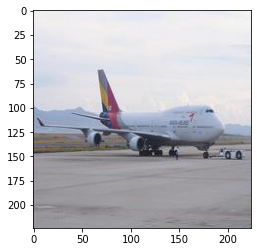

ground truth qst: is this plane landing ? ans: no
generated qst: what is the plane doing ? ans: landing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131666.jpg


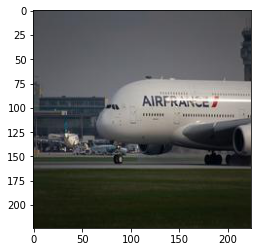

ground truth qst: is this a large airplane ? ans: yes
generated qst: what is the name of the airline ? ans: united


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000605.jpg


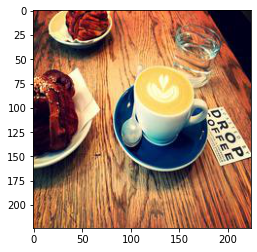

ground truth qst: what liquid is inside the clear glass ? ans: water
generated qst: what is the green vegetable ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262662.jpg


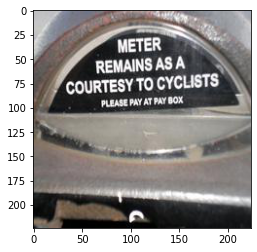

ground truth qst: where are you supposed to pay according to the picture ? ans: yes
generated qst: what is the name of the street sign ? ans: unknown


In [7]:
qst_vocab = train_dataset.qst_vocab
ans_vocab = train_dataset.ans_vocab
unk_idx = ans_vocab.unk2idx

qst_encoder = model.qst_encoder
qst_encoder.deterministic = True
qst_encoder.temperature = 0.1
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')

def evaluate_qst(model, data_loader, N=24):
    print( 'Evaluating question answer pairs' )
    num_eval = 0
    for batch_idx, batch_sample in enumerate(data_loader):
        if num_eval >= N:
            break
        # print(f'batch_idx: {batch_idx}')
        image = batch_sample['image'].to(DEVICE)
        question = batch_sample['question']
        answer = batch_sample['answer_label']
        image_path = batch_sample['image_path']
        
        # ground truth question and answers
        qst = [ qst_vocab.arr2qst( q ) for q in question ]
        ans = [ ans_vocab.idx2word( a ) for a in answer ]
        
        # generated question-answer
        gen_question, gen_answer = model.generate( image )
        gen_answer[:, unk_idx] = -9999.
        gen_answer = torch.argmax( gen_answer, 1 )
        gen_qst = [ qst_vocab.arr2qst( q ) for q in gen_question ]
        gen_ans = [ ans_vocab.idx2word( a ) for a in gen_answer ]
        
        n = len( image )
        for i in range( n ):
            print( f'\n\nimage path:{image_path[i]}' )
            img = mpimg.imread(image_path[i])
            imgplot = plt.imshow(img)
            plt.show()
            print( f'ground truth qst: {qst[i]} ans: {ans[i]}' )
            print( f'generated qst: {gen_qst[i]} ans: {gen_ans[i]}' )
        num_eval += n
    
evaluate_qst(model, train_loader)

### Evaluate Model ( Stochastic Sampling )

qst_encoder deterministic: False temperature: 0.6
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000497558.jpg


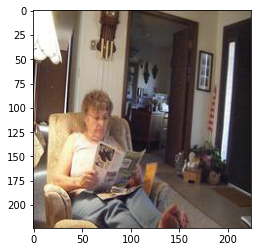

ground truth qst: does the room look crowded ? ans: yes
generated qst: what is the man holding ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131339.jpg


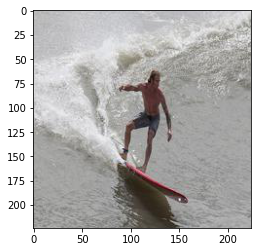

ground truth qst: what kind of suit is he wearing ? ans: shorts
generated qst: is the man in the water ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000154.jpg


ground truth qst: is the zebra ' s tail up ? ans: no
generated qst: how many zebras are there ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131909.jpg


ground truth qst: are there a group of people sitting together eating at a restaurant in this picture ? ans: no
generated qst: are there any people sitting in the room ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524389.jpg


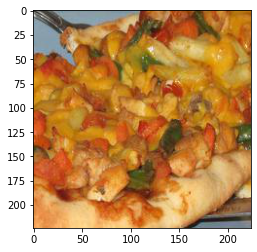

ground truth qst: what are the red things on the pizza ? ans: peppers
generated qst: what is the brand of the salad ? ans: tomato


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524730.jpg


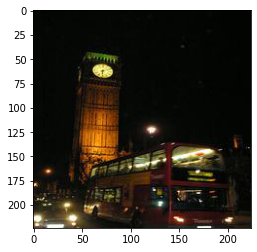

ground truth qst: what kind of transport is shown ? ans: bus
generated qst: is the sky clear ? ans: 0


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000510665.jpg


ground truth qst: where is the woman ? ans: bus
generated qst: what color is the bus ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393781.jpg


ground truth qst: does broccoli increase t levels ? ans: no
generated qst: what is the green vegetable ? ans: broccoli


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393649.jpg


ground truth qst: what color shirt is this man wearing ? ans: gray
generated qst: what color is the man ' s helmet ? ans: black


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525100.jpg


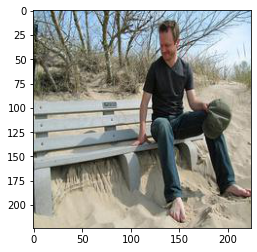

ground truth qst: is this man wearing shoes ? ans: no
generated qst: what color is the surfboard ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000113.jpg


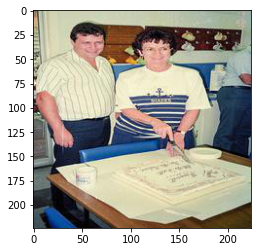

ground truth qst: are there any pens on the table ? ans: no
generated qst: what is the man ' s expression ? ans: smile


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000510665.jpg


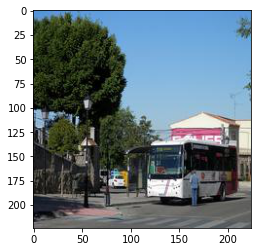

ground truth qst: what does the pink and white tent say on the right ? ans: unsure
generated qst: what color is the bus ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393394.jpg


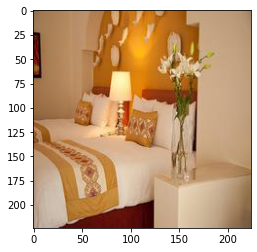

ground truth qst: is this a hotel ? ans: yes
generated qst: what shape are the windows ? ans: square


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524651.jpg


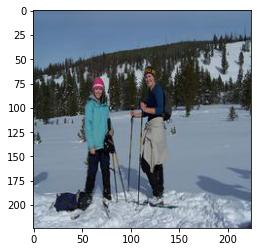

ground truth qst: who is with the man ? ans: woman
generated qst: is this a child ' s kite ? ans: man


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000568135.jpg


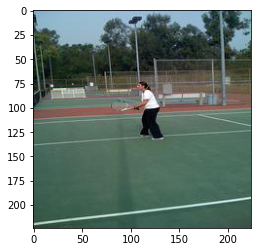

ground truth qst: what is the person holding ? ans: racket
generated qst: what color is the court ? ans: blue


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000152974.jpg


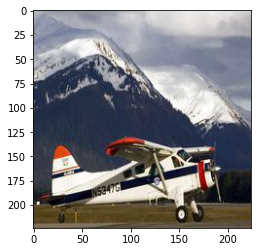

ground truth qst: what is on the mountain tops ? ans: snow
generated qst: what color is the sky ? ans: blue


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000984.jpg


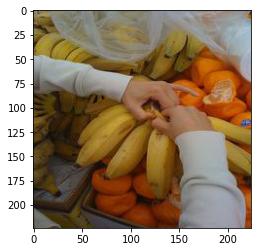

ground truth qst: is this a full meal ? ans: no
generated qst: is this a cake ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262307.jpg


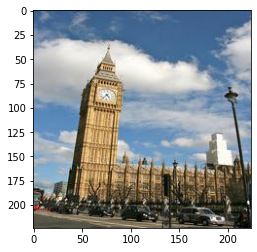

ground truth qst: what time does the clock say ? ans: <unk>
generated qst: what material is the building made of ? ans: wood


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263264.jpg


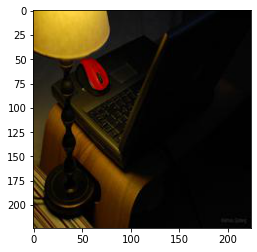

ground truth qst: is the laptop open ? ans: yes
generated qst: what is the table made of ? ans: wood


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393854.jpg


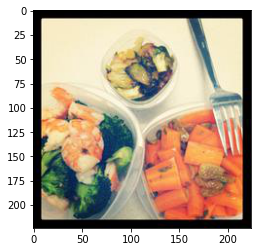

ground truth qst: what color is the garnish used on all the dishes ? ans: green
generated qst: what is the green stuff on top ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000546151.jpg


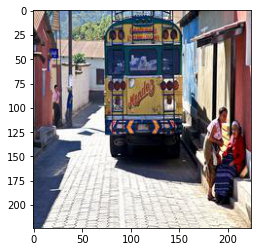

ground truth qst: is the bus stopped ? ans: no
generated qst: what color is the train car ? ans: yellow


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131339.jpg


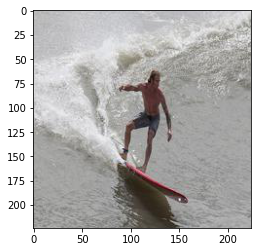

ground truth qst: what is the man wearing ? ans: shorts
generated qst: what is the man riding on ? ans: surfboard


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263261.jpg


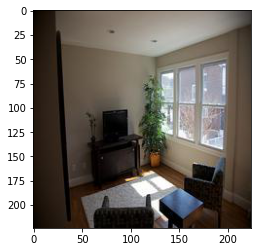

ground truth qst: how many window panes are there ? ans: 3
generated qst: what color is the wall on the left ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393844.jpg


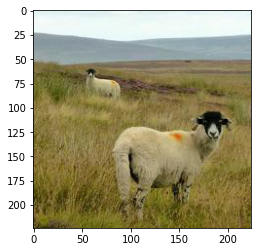

ground truth qst: what is the landscape of the picture ? ans: grass
generated qst: what kind of animal is this ? ans: sheep


In [8]:
qst_encoder = model.qst_encoder
qst_encoder.deterministic = False
qst_encoder.temperature = 0.6
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')
evaluate_qst(model, train_loader, N=24)